In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philchodrow/Documents/teaching/ml-notes/source':
  os.chdir(r'/Users/philchodrow/Documents/teaching/ml-notes/source')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap_external.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/codecs.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/aliases.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/__init__.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/utf_8.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/latin_1.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/abc.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/io.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/stat.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3

/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_442/949127318.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
#| code-fold: true
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
url = "../data/credit-risk/credit_risk_dataset.csv"

In [3]:
#| echo: false
pd.options.mode.chained_assignment = None  

In [4]:
#---
df = pd.read_csv(url)
df = df[["loan_int_rate", "loan_percent_income", "loan_status"]]
df = df.dropna()
#---

In [5]:
#---
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2) # 20% test set
#---

In [6]:
#---
X_train = df_train[["loan_int_rate", "loan_percent_income"]]
y_train = df_train["loan_status"]

X_test = df_test[["loan_int_rate", "loan_percent_income"]]
y_test = df_test["loan_status"]
#---

In [7]:
#| echo: false
n = df_train.shape[0]

In [8]:
#| eval: false

s = [] # vector of scores
for i in range(n):
    s.append(compute_score(X[i], w))

In [9]:
#---
def linear_score(X, w):
    return X@w
#---

In [10]:
w = np.array([0.01, 1.0])
s = linear_score(X_train, w)

[Text(0, 0.5, 'Frequency')]

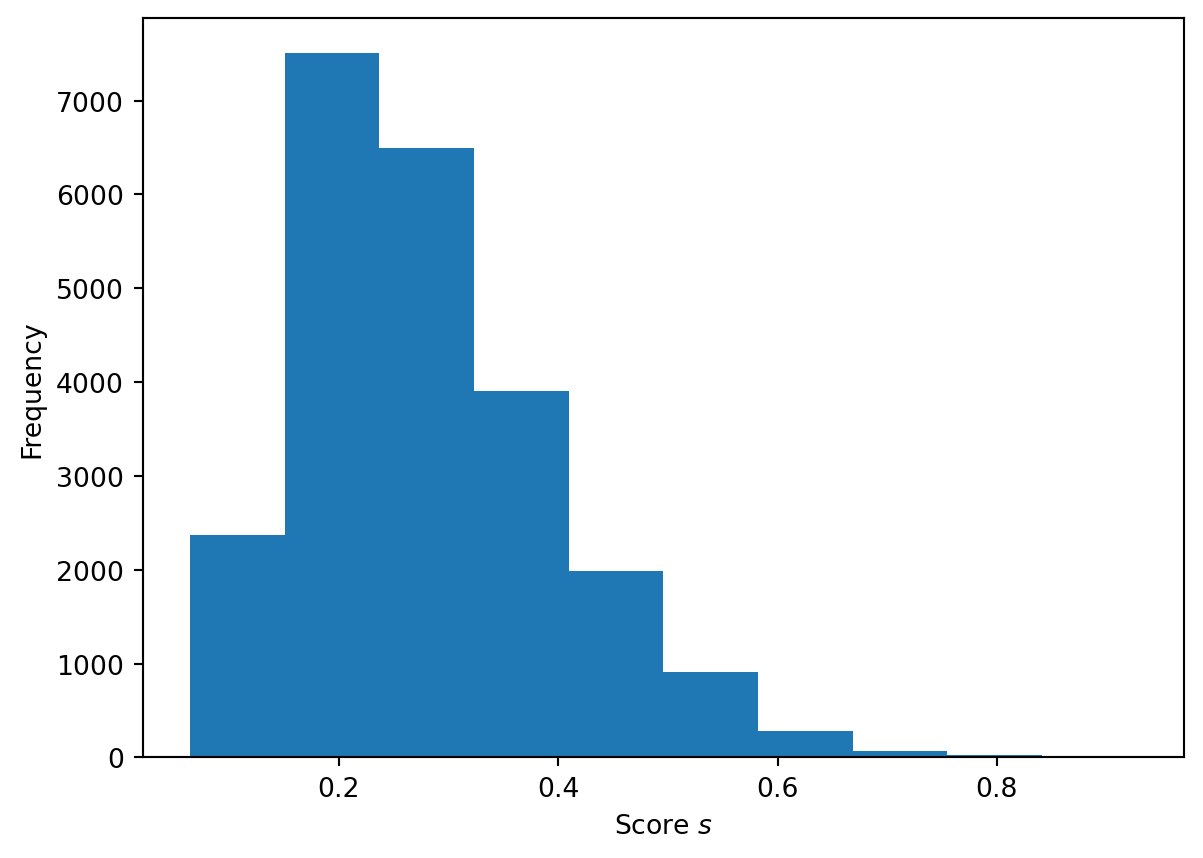

In [11]:
plt.hist(s)
plt.gca().set(xlabel = r"Score $s$") 
plt.gca().set(ylabel = "Frequency")

In [12]:
t = 0.4

In [13]:
def score_function(X, w):
    return X@w

w = np.array([0.01, 1])
s = score_function(X_train, w)

In [14]:
def predict(X, w, t):
    return 1*score_function(X, w) >= t

[Text(0.5, 0, 'False Positive Rate'),
 Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 1.0, 'ROC Curve')]

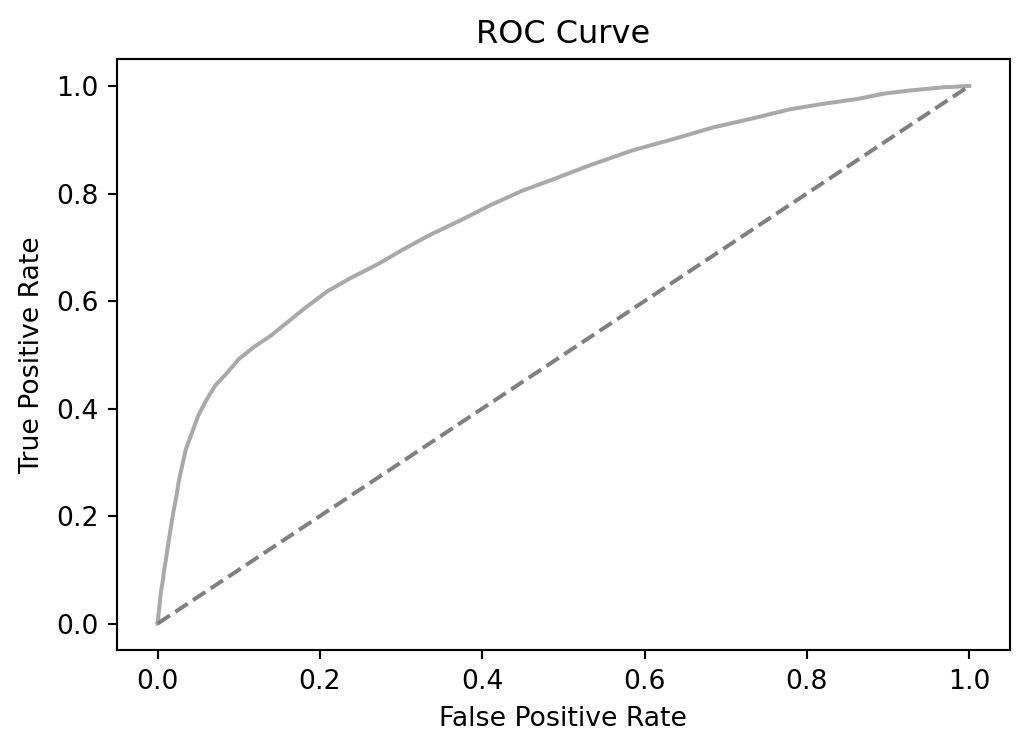

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

num_thresholds = 101

FPR = np.zeros(num_thresholds)
TPR = np.zeros(num_thresholds)
T = np.linspace(s.min()-0.1, s.max()+0.1, num_thresholds)

for i in range(num_thresholds):
    t = T[i]
    preds    = predict(X_train, w, t)
    FPR[i]   = ((preds == 1) & (y_train == 0)).sum() / (y_train == 0).sum()
    TPR[i]   = ((preds == 1) & (y_train == 1)).sum() / (y_train == 1).sum()

ax.plot(FPR, TPR, color = "darkgrey")
ax.plot([0,1], [0,1], linestyle="--", color = "grey")
ax.set(xlabel = "False Positive Rate", ylabel = "True Positive Rate", title = "ROC Curve")

In [16]:
FPR

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99728231e-01, 9.97988912e-01,
       9.92499185e-01, 9.83965648e-01, 9.70214154e-01, 9.51842592e-01,
       9.28361778e-01, 8.95858245e-01, 8.62756821e-01, 8.20632677e-01,
       7.78671595e-01, 7.31927383e-01, 6.83335145e-01, 6.35340798e-01,
       5.85335363e-01, 5.32177411e-01, 4.90868573e-01, 4.48635721e-01,
       4.10316339e-01, 3.73355800e-01, 3.36014784e-01, 3.01880639e-01,
       2.71551256e-01, 2.36710512e-01, 2.09751060e-01, 1.82574193e-01,
       1.60343516e-01, 1.40069573e-01, 1.19089031e-01, 1.00445701e-01,
       8.51723013e-02, 7.09316230e-02, 5.94629851e-02, 5.01141428e-02,
       4.18523753e-02, 3.47863898e-02, 3.05467986e-02, 2.60897924e-02,
       2.30459833e-02, 1.97847592e-02, 1.73388412e-02, 1.50016306e-02,
       1.26644200e-02, 1.08163931e-02, 9.13142733e-03, 7.60952277e-03,
      